In [1]:
import tensorflow as tf
%pip install pyyaml
%pip install tqdm
%pip install tensorboardX
%pip install ogb

%pip install kneed
%pip install sklearn
%pip install wandb
#Collegamento a Drive
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=d1b5cc63a9b2d9a2e09256f27374d583ea95f3e87397c567ce81e5c4d05c8051
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━

In [2]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!sudo apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!sudo apt-get update
!sudo apt-get -y install cuda=10.2.89-1

--2023-09-25 08:48:49--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2023-09-25 08:48:49 (5.05 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2023-09-25 08:48:49--  https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response.

In [6]:
device_list = tf.test.gpu_device_name()
if device_list != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_list))
!pip install dgl-cu102 -f https://data.dgl.ai/wheels/repo.html
import numpy as np
!pip install torchmetrics
import logging
import numpy as np
from tqdm import tqdm
import torch
import ast
import copy
import os
import csv
import pandas as pd
import dgl
import torch
from sklearn.model_selection import train_test_split
from dgl.data import DGLDataset
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

Found GPU at: /device:GPU:0
Looking in links: https://data.dgl.ai/wheels/repo.html


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Tesi_LossAcc/Dataframe_Base_Prediction.csv', index_col = 0)
t_df = df[['term', 'concept']].copy()
t_df = t_df.drop_duplicates()
import ipywidgets as widgets
from IPython.display import display, clear_output

# Funzione per gestire la selezione dei termini
selected_terms = []

def select_term(b):
    term = term_selector.value
    if term not in selected_terms:
        selected_terms.append(term)
        with out:
            clear_output(wait=True)
            print(f'Termini selezionati: {selected_terms}')
    else:
        with out:
            clear_output(wait=True)
            print(f'Il termine "{term}" è già stato selezionato.')

# Funzione per confermare la selezione
def confirm_selection(b):
    global selected_terms
    if selected_terms:
        with out:
            clear_output(wait=True)
            print(f'Termini selezionati: {selected_terms}')
    else:
        with out:
            clear_output(wait=True)
            print('Nessun termine selezionato.')

# Widget per selezionare i termini
term_selector = widgets.Select(
    options=t_df['term'].unique(),
    description='Seleziona un termine:',
    rows=25
)

# Widget per confermare la selezione (pulsanti)
select_button = widgets.Button(
    description='Seleziona termine',
    button_style='success',
    icon='check'
)
select_button.on_click(select_term)

confirm_button = widgets.Button(
    description='Conferma selezione',
    button_style='info',
    icon='check'
)
confirm_button.on_click(confirm_selection)

# Output widget to display information
out = widgets.Output()


display(term_selector)
display(select_button)
display(confirm_button)
display(out)

Select(description='Seleziona un termine:', options=('Plain chest X-ray (procedure)', 'Fracture of pelvis', 'P…

Button(button_style='success', description='Seleziona termine', icon='check', style=ButtonStyle())

Button(button_style='info', description='Conferma selezione', icon='check', style=ButtonStyle())

Output()

<ipython-input-11-89fee57c48ce>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_1.rename(columns={'patient_id': 'source'}, inplace=True)


Il modello ha effettuato le seguenti predizioni:


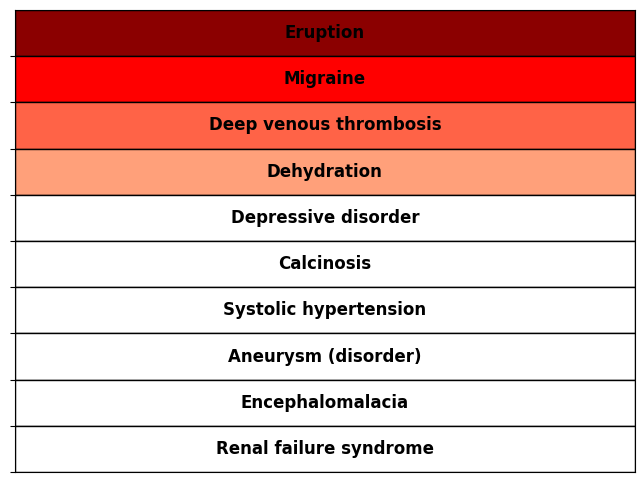

In [11]:
# Creazione del dataframe
ST_df = pd.DataFrame({'selected_terms': selected_terms})
# Unione "ST_df" con "t_df"
ST_df = ST_df.merge(t_df, left_on='selected_terms', right_on='term', how='inner')

# Eliminazione colonna "term" di t_df
ST_df.drop('term', axis=1, inplace=True)
# Aggiunta colonna "patient_id" con valori tutti uguali a 1
ST_df['patient_id'] = 1

ST_df.rename(columns={'selected_terms': 'term'}, inplace=True)

concatenated_df = pd.concat([df, ST_df], ignore_index=True)
feat_vect = (concatenated_df.groupby('patient_id')['concept'].value_counts().unstack().fillna(0)).reset_index()
feat_1 = feat_vect[feat_vect['patient_id'] == 1]
feat_1.rename(columns={'patient_id': 'source'}, inplace=True)
single_node_features_df = feat_1
single_node_features_df = single_node_features_df.drop(columns = 'source')
single_node_features = torch.tensor(single_node_features_df.values, dtype=torch.float32)
# Creazione del grafo DGL con un solo nodo
g3 = dgl.graph([], num_nodes=1)
# Aggiunta features e label al nodo
g3.ndata['feat'] = single_node_features
# Aggiunta identificatore del nodo (source)
g3.ndata['id'] = torch.tensor([1], dtype=torch.long)
node_features = g3.ndata['feat']
#node_labels = g3.ndata['label']
node_ids = g3.ndata['id']
import sys
sys.path.append("/content/drive/MyDrive/Tesi_LossAcc/GraphMAE2-main/")
from utils import accuracy, set_random_seed, show_occupied_memory, get_current_lr



# Caricamento modello
model_path = "/content/drive/MyDrive/Tesi_LossAcc/best_model.pth"
model = torch.load(model_path)
# Caricamento grafo
loaded_graphs, _ = dgl.load_graphs("/content/drive/MyDrive/Tesi_LossAcc/Dati_Di_INPUT.txt")
graph = loaded_graphs[0]

# Caricamento dati x da "Dati_Di_INPUT_x.txt"
x_np = np.loadtxt("/content/drive/MyDrive/Tesi_LossAcc/Dati_Di_INPUT_x.txt")
x = torch.tensor(x_np, dtype=torch.float32)

# Caricamento modello2
loaded_model = torch.load('/content/drive/MyDrive/Tesi_LossAcc/model_embed.pth')
#loaded_model.to(device)  # Sposta il modello sulla GPU se necessario
# Aggiunta collegamento di autocorrelazione (self-loop) ai nodi del grafo
g3 = dgl.add_self_loop(g3)

g3 = g3.to('cuda:0')
feat = g3.ndata['feat'].to('cuda:0')
output_features = loaded_model(g3, feat)

model.eval()

# Trasferimento su GPU
g3 = g3.to('cuda:0')
output_features = output_features.to('cuda:0')


with torch.no_grad():
    predictions = model(g3, output_features)
# Estrazione valore predittivo per il nodo in g3
predicted_values = predictions[0].cpu().numpy()

# Creazione dataframe con i risultati
result_per_inferenza = pd.DataFrame({"Node ID": [1], "predizioni": [predicted_values.tolist()]})


result_per_inferenza.to_csv("/content/drive/MyDrive/Tesi_LossAcc/result_predictionNEW.csv", index=False)
df3 = pd.read_csv("/content/drive/MyDrive/Tesi_LossAcc/result_predictionNEW.csv")
# Creazione vettore

df_modified = df3.copy()


for index, row in df_modified.iterrows():
    # Stringa delle predizioni per la riga corrente
    pred_str = row['predizioni']

    # Rimozione caratteri "[" e "]" dalla stringa
    pred_str = pred_str.strip("[]")

    # Divisione stringa in una lista di valori
    pred_list = pred_str.split(',')

    # Conversione valori da stringhe a float
    pred_float = [float(val) for val in pred_list]

    # Assegnazone lista di float modificata alla colonna 'predizioni'
    df_modified.at[index, 'predizioni'] = pred_float

# Scegli il valore k
k = 10
# Creazione della colonna "ranked"
df_modified['ranked'] = df_modified['predizioni'].apply(lambda x: np.argsort(x)[::-1].argsort() + 1)
merged_df = df_modified
#Top k
merged_df['ranked'] = merged_df['ranked'].apply(lambda x: [0 if val > k else val for val in x])
def parse_file(filename, first_row_header=True, columns=None):
    with open(filename, encoding='utf-8') as f:
        entities = [[n.strip() for n in line.split('\t')] for line in f]
        return pd.DataFrame(entities[1:], columns=entities[0] if first_row_header else columns)
int_desc = parse_file(f'drive/MyDrive/Tesi_LossAcc//SnomedCT_MonolithRF2_PRODUCTION_20221221T120000Z/Snapshot/Terminology/sct2_Description_MONOSnapshot-en_GB_20221221.txt')

new_df = int_desc[['conceptId', 'term']]

new_df = new_df.drop_duplicates(subset='conceptId', keep='first')
# Funzione per ottenere gli indici dei primi k valori massimi in una lista
def topk_indices(arr, k):
    return list(np.argsort(arr)[-k:])


merged_df['new_pred'] = merged_df['predizioni'].apply(lambda x: [1 if i in topk_indices(x, k) else 0 for i in range(len(x))])

# Creazione del DataFrame "predizioni_effettuate_df" : Deve contenere i valori memorizzati in ranked
predizioni_effettuate_df = pd.DataFrame()

# Aggiunta della colonna "Node ID" al DataFrame "predizioni_effettuate_df"
predizioni_effettuate_df['Node ID'] = merged_df['Node ID']

# Creazione delle 1364 colonne nel DataFrame "predizioni_effettuate_df" riempite con i valori dei vettori in "ranked"
predizioni_colonne = pd.DataFrame(merged_df['ranked'].to_list())
predizioni_effettuate_df = pd.concat([predizioni_effettuate_df, predizioni_colonne], axis=1)
labels_path = "/content/drive/MyDrive/Tesi_LossAcc/LabelsLess1364.csv"

labels_df = pd.read_csv(labels_path, index_col=0)
labels_df = labels_df.drop(columns='source')
# Creazione del DataFrame "pred_eff" con la colonna "Node ID" da "predizioni_effettuate_df"
pred_eff = pd.DataFrame()
pred_eff['Node ID'] = predizioni_effettuate_df['Node ID']

# Rinominazione delle colonne di "predizioni_effettuate_df" con i nomi delle colonne di "labels_df"
pred_eff_columns = ['Node ID'] + list(labels_df.columns)
predizioni_effettuate_df.columns = pred_eff_columns

# Unione di tutte le colonne contemporaneamente
pred_eff = pd.concat([pred_eff, predizioni_effettuate_df[pred_eff_columns[1:]]], axis=1)
pred_eff2 = pred_eff
import pandas as pd

# Creazione del DataFrame "concept_predicted"
concept_predicted = pd.DataFrame(columns=['Node ID', 'concept', 'rank'])

# Iterazione sui Node ID in "pred_eff2"
for node_id, row in pred_eff2.iterrows():
    # Filtraggio delle colonne con valore maggiore o uguale a 1 per il Node ID corrente
    concepts = pred_eff2.columns[1:][row[1:] >= 1.0].tolist()
    ranks = row[1:][row[1:] >= 1.0].tolist()

    # Creazione del DataFrame temporaneo per il Node ID corrente
    temp_df = pd.DataFrame({'Node ID': [pred_eff2.loc[node_id, 'Node ID']] * len(concepts), 'concept': concepts, 'rank': ranks})

    # Aggiunta del DataFrame temporaneo a "concept_predicted"
    concept_predicted = pd.concat([concept_predicted, temp_df], ignore_index=True)

merged_df = pd.merge(concept_predicted, new_df, left_on='concept', right_on='conceptId', how='inner')

import matplotlib.pyplot as plt
# Ordinamento dataframe in base al rank
sorted_df = merged_df.sort_values(by='rank')

# Estrazione primi 10 termini
top_terms = sorted_df.head(10)

print("Il modello ha effettuato le seguenti predizioni:")

# Creazione dell'istogramma
fig, ax = plt.subplots(figsize=(8, 6))

# Definizione dei colori per i rettangoli
colors = ['#8B0000', 'red', '#FF6347', '#FFA07A', 'white', 'white', 'white', 'white', 'white', 'white']

# Creazione dei rettangoli con i termini
for i, (_, row) in enumerate(top_terms.iterrows()):
    term = row['term']
    ax.add_patch(plt.Rectangle((0, 9 - i), 1, 1, color=colors[i], ec='black'))
    ax.annotate(term, (0.5, 9 - i + 0.5), color='black', weight='bold',
                fontsize=12, ha='center', va='center')

# Impostazioni per l'asse
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xticks([])
ax.set_yticks(range(10))
ax.set_yticklabels([])


plt.show()